# Метод k-means

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn import preprocessing
import sys
import matplotlib.pyplot as plt
import sklearn.datasets as dts

**Определяем кол-во кластеров с помощью метода локтя**

In [2]:
def create_elbow_gr(X):
    colors = ["yellow", "green", "red"]
    K = range(1, 15)
    models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
    dist = [model.inertia_ for model in models] # находим расстояния до центров по формуле сложения средних квадратов расстояний класстеров

    # Рисуем "локоть"
    plt.plot(K, dist, marker='o', color=colors[1])
    plt.xlabel('Кол-во кластеров')
    plt.ylabel("Сумма расстояний")
    plt.title("Метод локтя для оптимального k")
    plt.show()

Iris plants dataset:


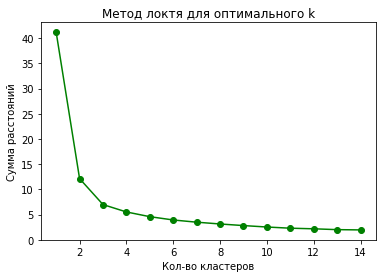

Optical recognition of handwritten digits dataset:


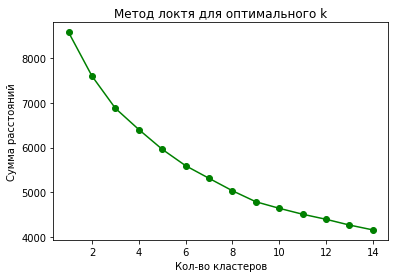

Wine recognition dataset:


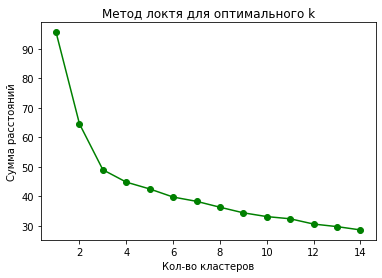

Breast cancer wisconsin (diagnostic) dataset:


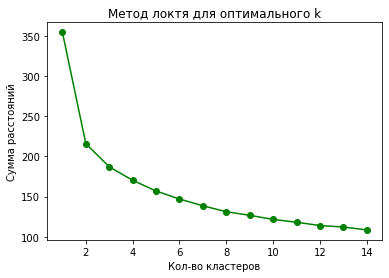

In [3]:

for load_dts, name_dts in [(dts.load_iris, "Iris plants dataset"),
                            (dts.load_digits, "Optical recognition of handwritten digits dataset"),
                            (dts.load_wine,"Wine recognition dataset"),
                            (dts.load_breast_cancer, "Breast cancer wisconsin (diagnostic) dataset")]:

    print(name_dts, ":", sep="")

    data = load_dts(); # Загружаем датасеты

    # Разделяем данные
    X = data.data
    # Нормализация
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    # y = data.target

    create_elbow_gr(X)


*По графикам мы можем определить примерное кол-во кластеров (в точке, где сумма расстояний перестает значительно падать при увеличении кол-во кластеров)
Так, для датасетов:
iris - 3+-1
digits - неочевидно, нужно пробовать 9 - 12
wine - 3+-1
wisconsing - 3+-1*

**Определяем кол-во кластеров**

In [4]:
for load_dts, name_dts in [(dts.load_iris, "Iris plants dataset"),
                            (dts.load_digits, "Optical recognition of handwritten digits dataset"),
                            (dts.load_wine,"Wine recognition dataset"),
                            (dts.load_breast_cancer, "Breast cancer wisconsin (diagnostic) dataset")]:

    print(name_dts, ":", sep="")

    data = load_dts(); # Загружаем датасеты

    # Разделяем данные
    X = data.data

    # Нормализация
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)

    df = pd.DataFrame(X, columns = range(0, len(X[0])))

    K = []
    if "digits" in name_dts:
        K = range(9, 13)
    else:
        K = range(2,5)

    models = {k:KMeans(n_clusters = k, random_state = 42, n_init=10).fit(df) for k in K}
    # dfs = [pd.DataFrame(models[k].labels_, columns = k) for k in K]
    dfs = []
    df_copy = df.copy()
    for k, model in models.items():
        df_copy['cluster'] = model.labels_
        dfs.append(df_copy.groupby('cluster').mean())
        df_copy = df.copy()

    # Выбираем кол-во кластеров
    if "Iris" in name_dts or "Wine" in name_dts:
        k = 3
    elif "Optical" in name_dts:
        k = 10
    else:
        k = 2

    # Смотрим точноть
    clusters = models[k].predict(X)
    print(models[k].inertia_)
    from scipy.stats import mode
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(data.target[mask])[0]

    from sklearn.metrics import accuracy_score
    print(accuracy_score(data.target, labels))

Iris plants dataset:
78.851441426146
0.8933333333333333
Optical recognition of handwritten digits dataset:
1165725.1115285035
0.7902058987200891
Wine recognition dataset:
2370689.6867829696
0.702247191011236
Breast cancer wisconsin (diagnostic) dataset:
77943099.87829886
0.8541300527240774
